In [ ]:
#PREVISÕES INFECTADOS COVID ALAGOAS VIA MÉTODO DE EULER

import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#Seção importação do arquivo csv via pandas, convertendo em um DataFrame.

df = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")

df.head()                                   #Mostra as 5 primeiras linhas do DataFrame 'df'

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00047,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00047,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Seção para filtragem de dados, selecionando somente os do estado de Alagoas.

intermediario = df['state'] == 'AL'         #Aqui, seleciona-se todas as linhas em que a coluna 'state' seja igual a 'AL'
al = df[intermediario]                      #Cria-se um novo DataFrame 'al'que contem somente os dados relativos à Alagoas



shape = al.shape
print(f'São analisados {shape[0]} dias\n')  #Usa-se o método shape para saber quantos dias estão sendo analisados (no caso, 634)

al.head()                                   #Mostra as 5 primeiras linhas do DataFrame 'al'


São analisados 634 dias



,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
32,11,2020-03-08,Brazil,AL,TOTAL,0,0,1,1,0,1,0.0,0.02996,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,11,2020-03-09,Brazil,AL,TOTAL,0,0,0,1,0,1,0.0,0.02996,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,11,2020-03-10,Brazil,AL,TOTAL,0,0,0,1,0,1,0.0,0.02996,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,11,2020-03-11,Brazil,AL,TOTAL,0,0,0,1,0,1,0.0,0.02996,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,11,2020-03-12,Brazil,AL,TOTAL,0,0,0,1,0,1,0.0,0.02996,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
'''Para descobrir a população total de alagoas durante o periodo de pesquisa,
será feito uma "regra de três" utilizando os casos totais e os casos totais
por 100.000 habitantes, de modo que:'''

N = (1*100000)/(0.02996)                       #N representa a população total

print(f'A população total no início do periodo analisado é de aproximadamente é de {int(N)} habitantes')

A população total no início do periodo analisado é de aproximadamente é de 3337783 habitantes


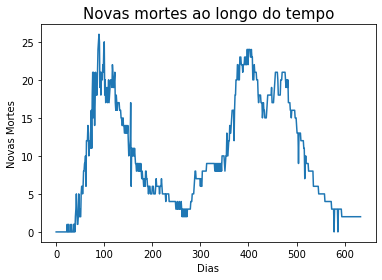

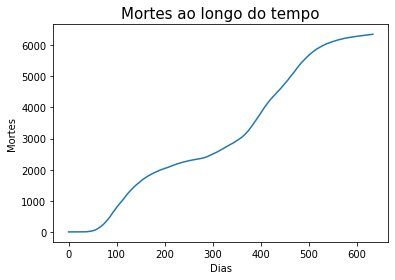

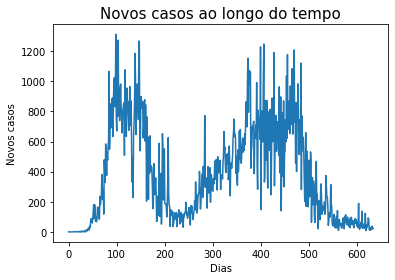

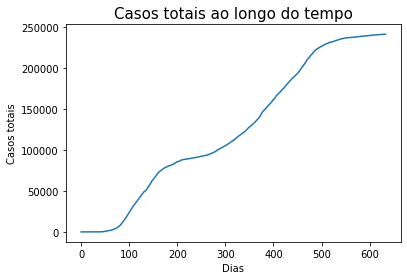

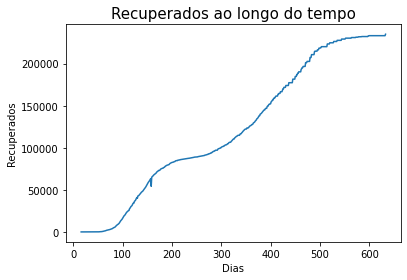

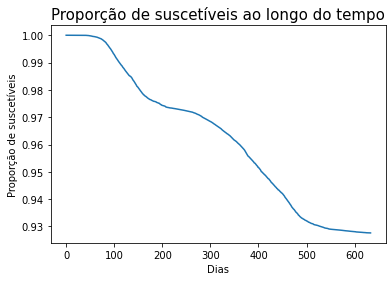

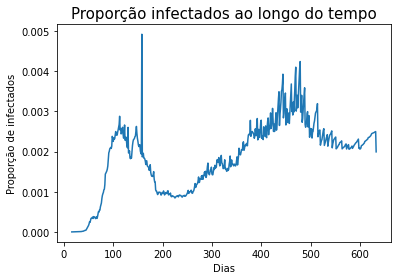

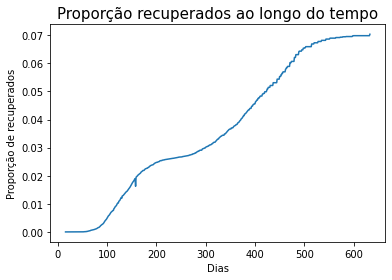

In [ ]:
#Seção para agrupar os dados em listas, para facilitar seu uso posterior.
#A plotagem de gráficos tem como intuito possibilitar uma melhor noção do comportamento de cada conjunto de dados ao longo do tempo

#Listas diretamente da tabela:
novas_mortes = []
mortes = []
novos_casos = []
casos_totais = []
recuperados = []

#Listas de proporções para a análise posterior:
s = []    #Suscetíveis/N
i = []    #Infectados/N
r = []    #Recuperados/N

dias = []
contador = 0

for cont in al.index:                     #Aqui serão criadas as listas definidas acima

  novas_mortes.append(al['newDeaths'][cont])
  mortes.append(al['deaths'][cont])
  novos_casos.append(al['newCases'][cont])
  casos_totais.append(al['totalCases'][cont])
  recuperados.append(al['recovered'][cont])

  p_suscetiveis = (N - al['totalCases'][cont]) / N
  s.append(p_suscetiveis)

  rec = al['recovered'][cont]
  p_infectados = (al['totalCases'][cont] - rec) / N
  i.append(p_infectados)
  
  p_recuperados = (rec) / N
  r.append(p_recuperados)

  dias.append(contador)
  contador += 1

plt.plot(dias,novas_mortes)                                #Utiliza a biblioteca matplotlib para criar o gráfico
plt.title('Novas mortes ao longo do tempo', fontsize=15)   #Define um título para o gráfico e o tamanho de sua fonte
plt.xlabel('Dias', fontsize=10)                            #Define o nome do eixo horizontal e o tamanho de sua fonte
plt.ylabel('Novas Mortes', fontsize=10)                    #Define o nome do eixo vertical e o tamanho de sua fonte
plt.show()                                                 #Mostra o gráfico
print()

plt.plot(dias,mortes)
plt.title('Mortes ao longo do tempo', fontsize=15)   
plt.xlabel('Dias', fontsize=10)                 
plt.ylabel('Mortes', fontsize=10) 
plt.show()
print()

plt.plot(dias,novos_casos)
plt.title('Novos casos ao longo do tempo', fontsize=15)   
plt.xlabel('Dias', fontsize=10)                 
plt.ylabel('Novos casos', fontsize=10) 
plt.show()
print()

plt.plot(dias,casos_totais)
plt.title('Casos totais ao longo do tempo', fontsize=15)   
plt.xlabel('Dias', fontsize=10)                 
plt.ylabel('Casos totais', fontsize=10) 
plt.show()
print()

plt.plot(dias,recuperados)
plt.title('Recuperados ao longo do tempo', fontsize=15)   
plt.xlabel('Dias', fontsize=10)                 
plt.ylabel('Recuperados', fontsize=10) 
plt.show()
print()

plt.plot(dias,s)
plt.title('Proporção de suscetíveis ao longo do tempo', fontsize=15)   
plt.xlabel('Dias', fontsize=10)                 
plt.ylabel('Proporção de suscetíveis', fontsize=10) 
plt.show()
print()

plt.plot(dias,i)
plt.title('Proporção infectados ao longo do tempo', fontsize=15)   
plt.xlabel('Dias', fontsize=10)                 
plt.ylabel('Proporção de infectados', fontsize=10) 
plt.show()
print()

plt.plot(dias,r)
plt.title('Proporção recuperados ao longo do tempo', fontsize=15)   
plt.xlabel('Dias', fontsize=10)                 
plt.ylabel('Proporção de recuperados', fontsize=10) 
plt.show()
print()

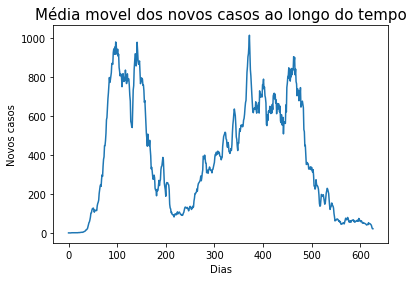



O primeiro pico ocorre no dia 97.


In [ ]:
#Nesta sessão, será identificado o primeiro pico de casos utilizando médias moveis

MV_novos_casos = []
dias = []
contador = 0
for c in range(len(novos_casos)-7):
  MV = (novos_casos[c] + novos_casos[c+1] + novos_casos[c+2] + novos_casos[c+3] +
        novos_casos[c+4] + novos_casos[c+5] + novos_casos[c+6])/7   #Tira-se a média de 7 dias a partir do dia 'c'.
  MV_novos_casos.append(MV)
  dias.append(contador)
  contador += 1

plt.plot(dias,MV_novos_casos)
plt.title('Média movel dos novos casos ao longo do tempo', fontsize=15)   
plt.xlabel('Dias', fontsize=10)                 
plt.ylabel('Novos casos', fontsize=10) 
plt.show()
print()

#A partir da análise do gráfico, percebe-se que o primeiro pico ocorre entre o dia 75 e 125, assim, podemos obter o dia exato do prineiro pico (primeiro maximo) da seguinte maneira:

possiveis_picos = MV_novos_casos[75:125]              #Define o intervalo descrito acima na lista
pico = MV_novos_casos.index(max(possiveis_picos))     #Acha o máximo valor (primeiro pico) nesse intervalo
print(f'\nO primeiro pico ocorre no dia {pico}.')

#Deste modo, descobre-se que o primeiro pico de casos ocorre no dia 97


In [ ]:
#Nesta sessão, iremos fatiar as listas de modo a analisar somente o período desejado

novas_mortes = novas_mortes[:97]
mortes = mortes[:97]
novos_casos = novos_casos[:97]
casos_totais = casos_totais[:97]
recuperados = recuperados[:97]
MV_novos_casos = MV_novos_casos[:97]

lst_s_futuro=s[97:]
lst_i_futuro=i[97:]
lst_r_futuro=r[97:]

s = s[97]
i = i[97]
r = r[97]


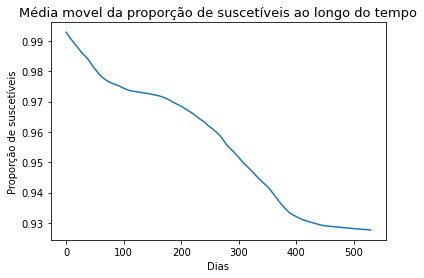

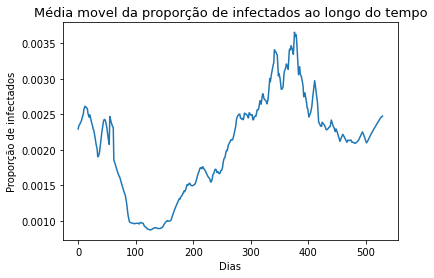

In [ ]:
#Nesta sessão, serão calculadas as médias móveis da proporção de suscetíveis e da proporção de infectados após o dia 97 (primeiro pico).

lst_MV_s = []
lst_MV_i = []
dias = []
contador = 0

for c in range(537-7):          #634 (dias total) -97 (dias até o primeiro pico)=537
  MV_s = (lst_s_futuro[c] + lst_s_futuro[c+1] + lst_s_futuro[c+2] +
          lst_s_futuro[c+3] + lst_s_futuro[c+4] + lst_s_futuro[c+5] + lst_s_futuro[c+6])/7
  lst_MV_s.append(MV_s)

  MV_i = (lst_i_futuro[c] + lst_i_futuro[c+1] + lst_i_futuro[c+2] +
          lst_i_futuro[c+3] + lst_i_futuro[c+4] + lst_i_futuro[c+5] + lst_i_futuro[c+6])/7
  lst_MV_i.append(MV_i)

  dias.append(contador)
  contador += 1

plt.plot(dias,lst_MV_s)
plt.title('Média movel da proporção de suscetíveis ao longo do tempo', fontsize=13)   
plt.xlabel('Dias', fontsize=10)                 
plt.ylabel('Proporção de suscetíveis', fontsize=10) 
plt.show()
print()

plt.plot(dias,lst_MV_i)
plt.title('Média movel da proporção de infectados ao longo do tempo', fontsize=13)   
plt.xlabel('Dias', fontsize=10)                 
plt.ylabel('Proporção de infectados', fontsize=10) 
plt.show()

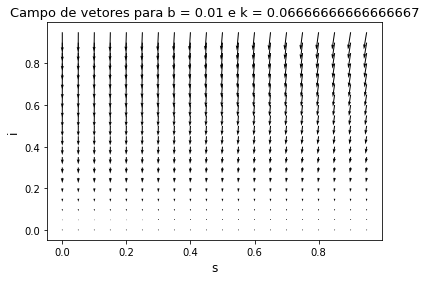

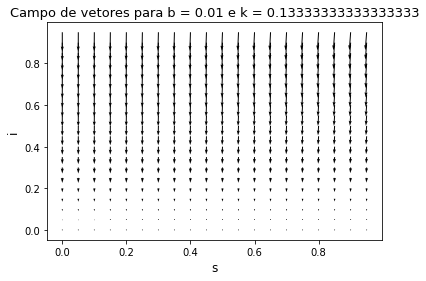

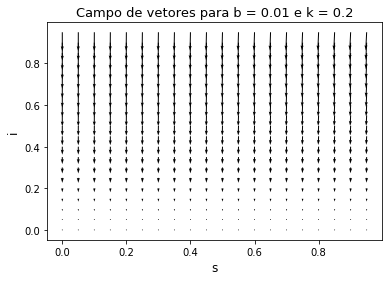

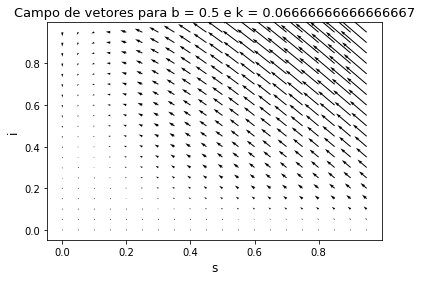

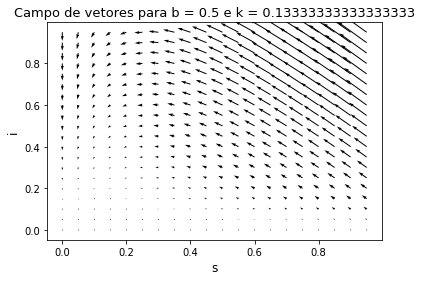

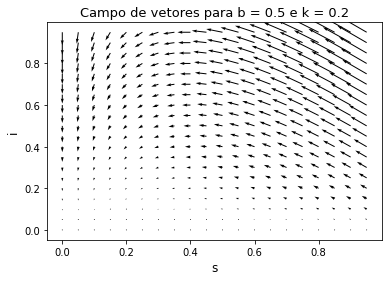

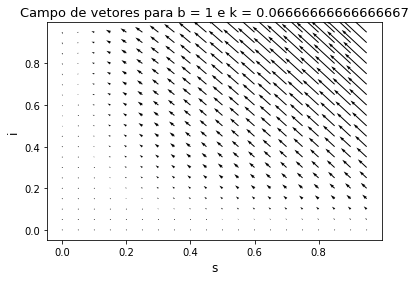

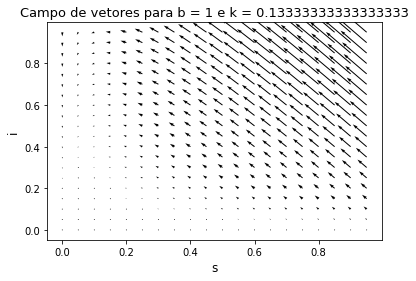

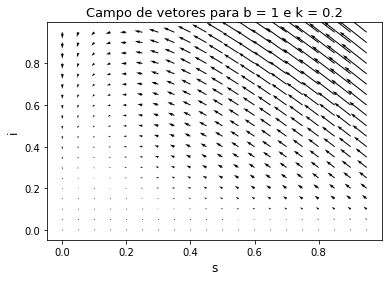

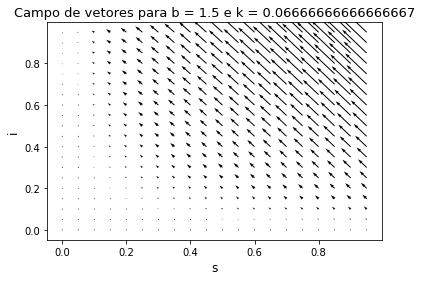

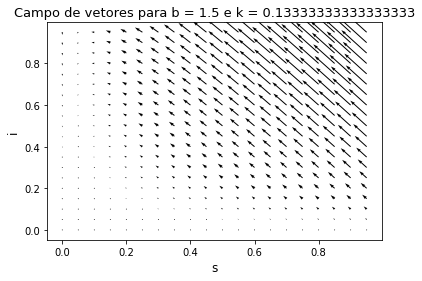

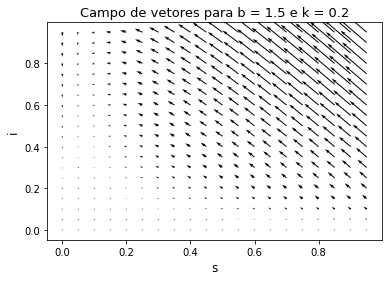

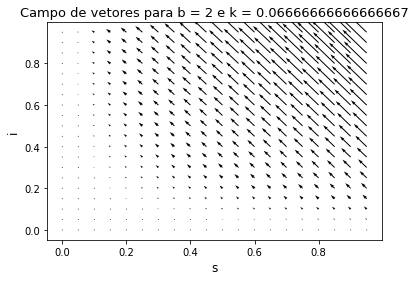

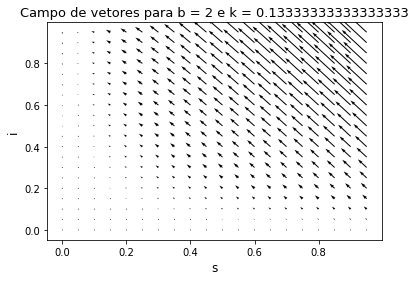

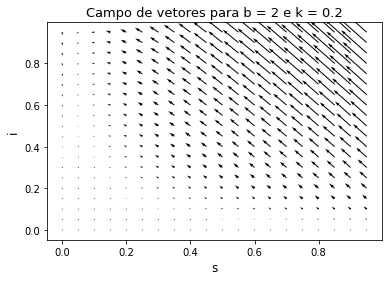

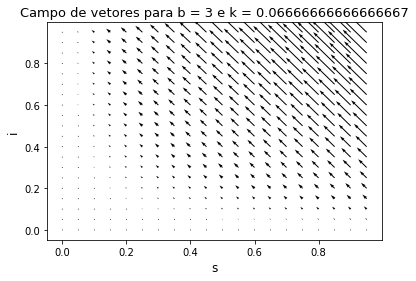

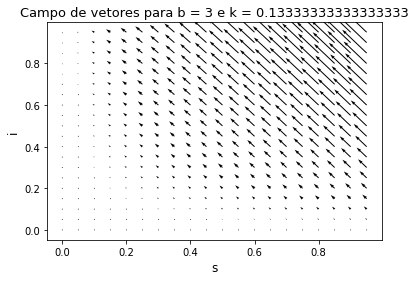

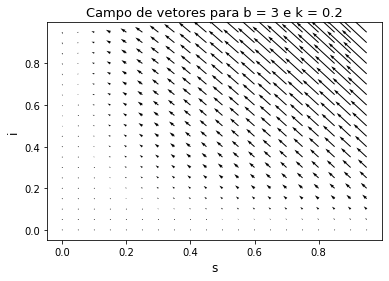

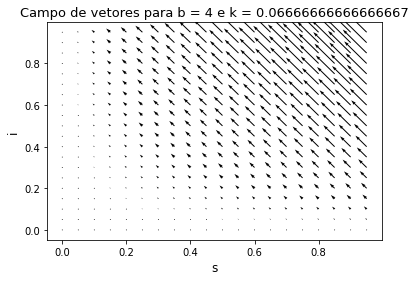

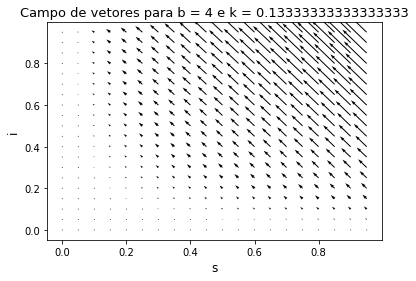

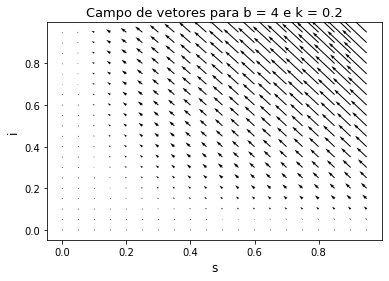

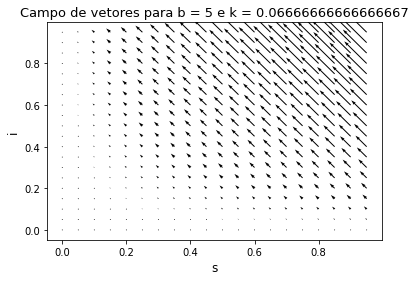

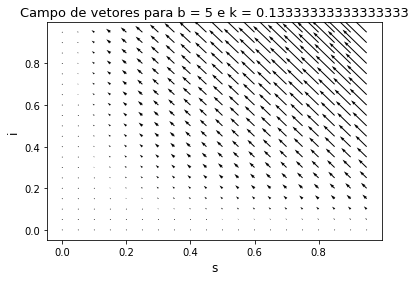

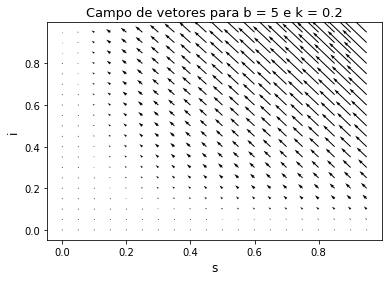

In [ ]:
'''Nesta sessão, será definida a função campo_vetores(s, i, b, k), que retorna um vetor
correspondente aos valores de s, i, k e b fornecidos (como descrito na documentação da função).

Após isso, são plotados os campos vetoriais correspondentes para cada valor de b e k
utilizados nos testes, para servir como exemplos.'''

def campo_vetores(s, i, b, k):
  '''(int, int, int, int) ---> (int, int)
  
  Recebe os valores iniciais s (proporção de sucetíveis no dia do primeiro pico),
  i (proporção de infectados no dia do primeiro pico), b (número médio de infectados
  que um suscetível encontra por dia) e k (relativo à duração da doença em um infectado)

  Retorna o par ordenado (x,y) das componentes horizontais e verticais do vetor correspondente
  à variação de s e i para os respectivos valores de b e k.
  '''

  mudanca_s = (-1)*(b*s*i)          #Componente horizontal de F(s,i)     
  mudanca_i = ((b*s)-k)*i           #Componente vertical de F(s,i)   

  return mudanca_s, mudanca_i


lista_k = [(1/15), (2/15), (3/15)]  #lista com alguns valores para serem testados para k no intervalo [(1/15),(3/15)]
lista_b = [0.01,0.5,1,1.5,2,3,4,5]  #lista com alguns valores para serem testados para b no intervalo [0,5]

for b in lista_b:
  for k in lista_k:
    #varições são os ritimios de mudança das variáveis x se refere a s e y se refere a i
    variacoes_x = []
    variacoes_y = []

    #eixo é uma forma de indicar os vetores iniciais(canto direito do gráfico)
    eixo_x = []
    eixo_y = []

    #faremos os gráficos acompanhando o desenrolar de 20 vetores no extremo canto direito
    for contador_1 in range(20):
      x = contador_1/20
      for contador_2 in range(20):
        y = contador_2/20

        eixo_x.append(x)
        eixo_y.append(y)

        (variacao_x, variacao_y) = campo_vetores(x, y, b, k)
        variacoes_x.append(variacao_x)
        variacoes_y.append(variacao_y)

    plt.quiver(eixo_x, eixo_y, variacoes_x, variacoes_y)
    plt.title(f'Campo de vetores para b = {b} e k = {k}', fontsize=13)   
    plt.xlabel('s', fontsize=12)                 
    plt.ylabel('i', fontsize=12) 
    plt.show()
    print()


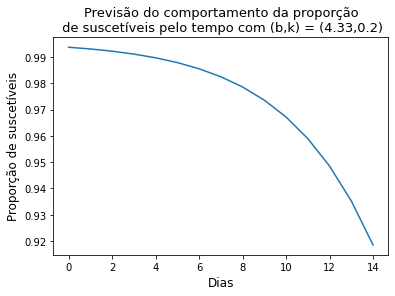

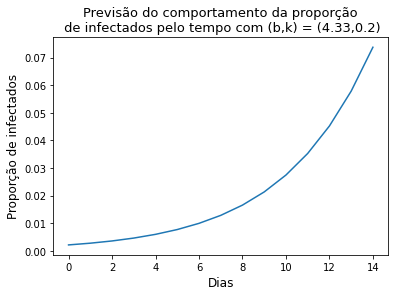

In [ ]:
#Nesta sessão, será desenvolvida a função que calcula, segundo o método de Euler, previsões futuras.
#para a proporção de infectados e de proporção de suscetíveis em uma lista.

def euler(s,i,b,k):
  '''(int, int ,int ,int) ---> (list, list)
  Recebe a proporção de suscetíveis inicial (s), a proporção de infectados inicial (i), à quantos infectados um
  suscetível tem contato por dia (em média) e um valor (k) relativo ao tempo que a doença fica em um infectado.
  Chama a função campo_vetores(s, i, b, k) para estabelecer as variações em s e i.
  
  Retorna uma lista contendo as previsões para a proporção de suscetíveis e a proporção de infectados para os próximos 14 dias.
  '''
  s_anterior = s
  i_anterior = i
  
  previsoes_s = [s]
  previsoes_i = [i]

  (mudanca_s, mudanca_i) = campo_vetores(s, i, b, k)

  for count in range(14):

    s_proximo = s_anterior+(1/14) * mudanca_s
    previsoes_s.append(s_proximo)
    s_anterior = s_proximo

    i_proximo = i_anterior+(1/14) * mudanca_i
    previsoes_i.append(i_proximo)
    i_anterior = i_proximo

    (mudanca_s, mudanca_i) = campo_vetores(s_anterior, i_anterior, b, k)

  return previsoes_s, previsoes_i

(previsoes_s, previsoes_i)=euler(s,i,4.33, 0.2)     #Valores de b e k utilizados para exemplificar o uso da função somente

plt.plot(previsoes_s)
plt.title('Previsão do comportamento da proporção\n de suscetíveis pelo tempo com (b,k) = (4.33,0.2)', fontsize=13)   
plt.xlabel('Dias', fontsize=12)                 
plt.ylabel('Proporção de suscetíveis', fontsize=12)
plt.show()
print()

plt.plot(previsoes_i)
plt.title('Previsão do comportamento da proporção\n de infectados pelo tempo com (b,k) = (4.33,0.2)', fontsize=13)   
plt.xlabel('Dias', fontsize=12)                 
plt.ylabel('Proporção de infectados', fontsize=12)
plt.show()

Erro=2.6902227523778352e-08
Os valores de b e k que resultam em um menor erro quadratico são: b = 0.3333333333333333 e k = 0.2




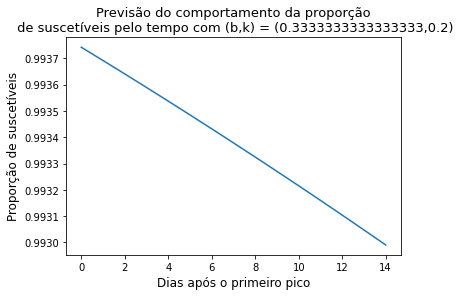

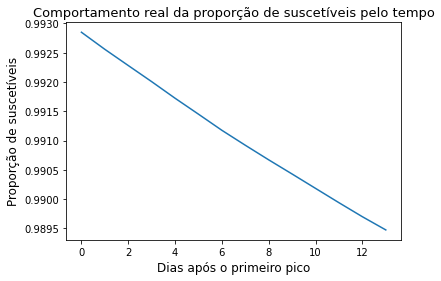

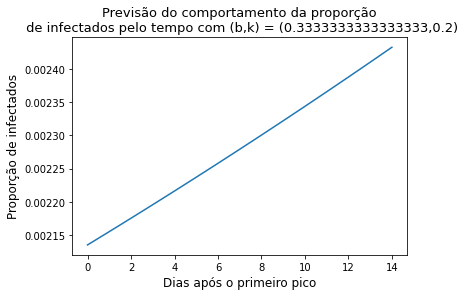

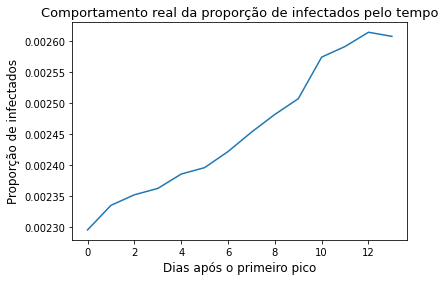

In [ ]:
#Aqui testaremos valores para b e k de forma a trazer previsões mais próximas do que de fato ocorreu 14 dias após o primeiro pico.

#lista_b contem alguns valores de b no intervalo [0,5]
lista_b = [0.3333333333333333, 0.6666666666666666, 1.0, 1.3333333333333333, 1.6666666666666667, 2.0, 2.3333333333333335,
           2.6666666666666665, 3.0, 3.3333333333333335, 3.6666666666666665, 4.0, 4.333333333333333, 4.666666666666667]

#Cria valores para k no intervalo [(1/15),(1/5)]
lista_k = []
for cont in range(10):
  lista_k.append((1/15)+cont*(2/135))

soma_s = 10000000000000000      #Atribui valores muito elevados para soma_s
soma_i = 10000000000000000      #Atribui valores muito elevados para soma_i
menor_i = soma_i

#Otimizando b e k focando na proporção de infectadis (i):
for b in lista_b:
  for k in lista_k:
      (previsoes_s,previsoes_i)=euler(s,i,b,k)
      for count in range(len(previsoes_i)):
        soma_i=(previsoes_i[count]-lst_MV_i[count])**2      #Verifica o erro quadratico associado
  if soma_i < menor_i:                                      #"Seleciona" o melhor par (b, k) baseado no par que resulta em um menor erro
    menor_i = soma_i
    print(f'Erro={menor_i}')
    melhorbk = (b,k)


print(f'Os valores de b e k que resultam em um menor erro quadratico são: b = {melhorbk[0]} e k = {melhorbk[1]}\n\n')

(previsoes_s, previsoes_i)=euler(s,i,melhorbk[0],melhorbk[1])

plt.plot(previsoes_s)
plt.title(f'Previsão do comportamento da proporção\n de suscetíveis pelo tempo com (b,k) = ({melhorbk[0]},{melhorbk[1]})', fontsize=13)   
plt.xlabel('Dias após o primeiro pico', fontsize=12)                 
plt.ylabel('Proporção de suscetíveis', fontsize=12)
plt.show()
print()

plt.plot(lst_MV_s[:14])
plt.title('Comportamento real da proporção de suscetíveis pelo tempo', fontsize=13)   
plt.xlabel('Dias após o primeiro pico', fontsize=12)                 
plt.ylabel('Proporção de suscetíveis', fontsize=12)
plt.show()
print()

plt.plot(previsoes_i)
plt.title(f'Previsão do comportamento da proporção\n de infectados pelo tempo com (b,k) = ({melhorbk[0]},{melhorbk[1]})', fontsize=13)   
plt.xlabel('Dias após o primeiro pico', fontsize=12)                 
plt.ylabel('Proporção de infectados', fontsize=12)
plt.show()
print()

plt.plot(lst_MV_i[:14])
plt.title('Comportamento real da proporção de infectados pelo tempo', fontsize=13)   
plt.xlabel('Dias após o primeiro pico', fontsize=12)                 
plt.ylabel('Proporção de infectados', fontsize=12)
plt.show()
print()

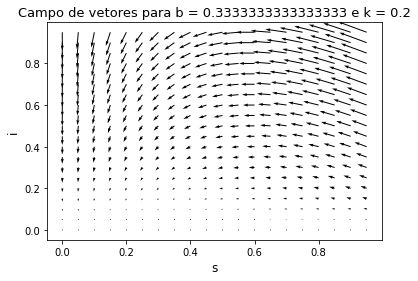

In [ ]:
#Nesta sessão, será plotado o campo de vetores com b e k ideais (valores obtidos acima)

b,k = melhorbk

variacoes_x = []
variacoes_y = []

eixo_x = []
eixo_y = []

for contador_1 in range(20):
  x = contador_1/20
  for contador_2 in range(20):
    y = contador_2/20

    eixo_x.append(x)
    eixo_y.append(y)

    (variacao_x, variacao_y) = campo_vetores(x, y, b, k)
    variacoes_x.append(variacao_x)
    variacoes_y.append(variacao_y)


plt.quiver(eixo_x, eixo_y, variacoes_x, variacoes_y)
plt.title(f'Campo de vetores para b = {b} e k = {k}', fontsize=13)   
plt.xlabel('s', fontsize=12)                 
plt.ylabel('i', fontsize=12) 
plt.show()